Probelem statement:
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.
In this project we will detect fraudulent credit card transactions with the help of Machine learning models. We will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

Data Understanding


The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from 'time' and 'amount, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount is the transaction amount. The feature class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.


Table of Contents

1. Importing dependencies
2. Exploratory data analysis
3. Splitting the data into train & test data
4. Model building
5. 
    .Perform Cross Validation With RepeateKfold
   
    .Perform cross validation with StratifiedKfold
   
    .RandomOverSampler with StratifiedKfold Cross Validation
   
    .Over sampling With SMOTE Oversampling
   
    .over sampling with ADASYN Oversampling
   
5.HyperParameter Tuning

6.Conclusion

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratry Data Analysis

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
#checcing persentage or distribution
df.groupby('Class')['Class'].count()/df['Class'].count()*100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

### Ploting Histogram

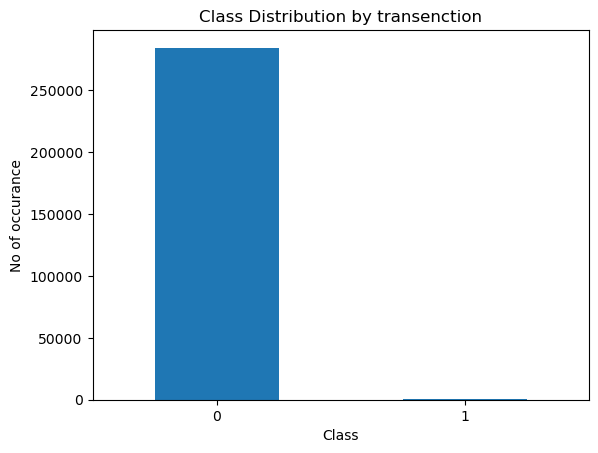

In [9]:
count = pd.Series(df['Class']).value_counts(sort=True)
count.plot(kind = 'bar',rot = 0)
plt.xticks(range(2))
plt.title('Class Distribution by transenction')
plt.ylabel('No of occurance')
plt.show()

### checking the correlation

In [10]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.188326e-16,-1.164018e-15,-9.082889e-16,2.085924e-17,-6.343731e-16,-1.018099e-15,-2.557889e-16,-1.347621e-16,...,-2.444306e-16,-4.201199e-16,6.217312e-16,-4.385333e-17,-9.832396e-16,-1.745526e-17,1.196577e-16,2.108702e-15,-0.227709,-0.101347
V2,-0.010593,4.188326e-16,1.000000e+00,3.140164e-16,-1.125909e-15,5.230686e-16,2.781752e-16,1.857398e-16,-5.698764e-17,2.006267e-17,...,-8.277282e-17,1.547272e-16,1.668081e-16,1.577058e-17,-4.530958e-16,1.984817e-16,-4.938067e-16,-5.182198e-16,-0.531409,0.091289
V3,-0.419618,-1.164018e-15,3.140164e-16,1.000000e+00,4.644369e-16,-5.483554e-17,1.627805e-15,5.239200e-16,-1.297365e-15,5.725902e-16,...,5.931009e-17,-1.115726e-15,-5.063673e-16,5.605700e-19,-1.118857e-15,-1.389572e-16,1.058098e-15,9.792787e-16,-0.210880,-0.192961
V4,-0.105260,-9.082889e-16,-1.125909e-15,4.644369e-16,1.000000e+00,-1.722056e-15,-7.565957e-16,-4.188169e-16,5.645256e-16,6.873528e-16,...,-1.862123e-16,-3.949686e-17,9.564529e-17,1.569977e-16,6.026069e-16,-4.237973e-16,4.577343e-17,-3.888959e-18,0.098732,0.133447
V5,0.173072,2.085924e-17,5.230686e-16,-5.483554e-17,-1.722056e-15,1.000000e+00,2.208263e-16,2.691713e-16,7.396815e-16,7.178142e-16,...,-3.990893e-16,1.277735e-16,-8.760100e-18,-1.142295e-15,5.021165e-16,4.450164e-16,6.538203e-16,-3.301835e-18,-0.386356,-0.094974
V6,-0.063016,-6.343731e-16,2.781752e-16,1.627805e-15,-7.565957e-16,2.208263e-16,1.000000e+00,1.213776e-16,-1.030439e-16,4.234240e-16,...,5.551919e-17,5.756004e-18,9.443837e-17,-1.070899e-15,4.568884e-16,-1.402561e-16,-4.500879e-16,2.493919e-16,0.215981,-0.043643
V7,0.084714,-1.018099e-15,1.857398e-16,5.239200e-16,-4.188169e-16,2.691713e-16,1.213776e-16,1.000000e+00,3.549393e-16,1.125386e-15,...,-2.122235e-16,-8.840620e-16,-4.458969e-16,9.812896e-18,-2.881866e-16,-9.494990e-16,-1.723845e-15,-2.921030e-16,0.397311,-0.187257
V8,-0.036949,-2.557889e-16,-5.698764e-17,-1.297365e-15,5.645256e-16,7.396815e-16,-1.030439e-16,3.549393e-16,1.000000e+00,4.340695e-16,...,3.830431e-16,2.065947e-16,6.910016e-17,-9.701203e-17,-4.609097e-16,-1.777597e-16,1.280491e-16,-6.187506e-16,-0.103079,0.019875
V9,-0.008660,-1.347621e-16,2.006267e-17,5.725902e-16,6.873528e-16,7.178142e-16,4.234240e-16,1.125386e-15,4.340695e-16,1.000000e+00,...,1.874693e-16,-6.976879e-16,-5.221067e-16,-1.449529e-16,6.679328e-16,-8.154251e-16,-6.111140e-17,1.106537e-15,-0.044246,-0.097733


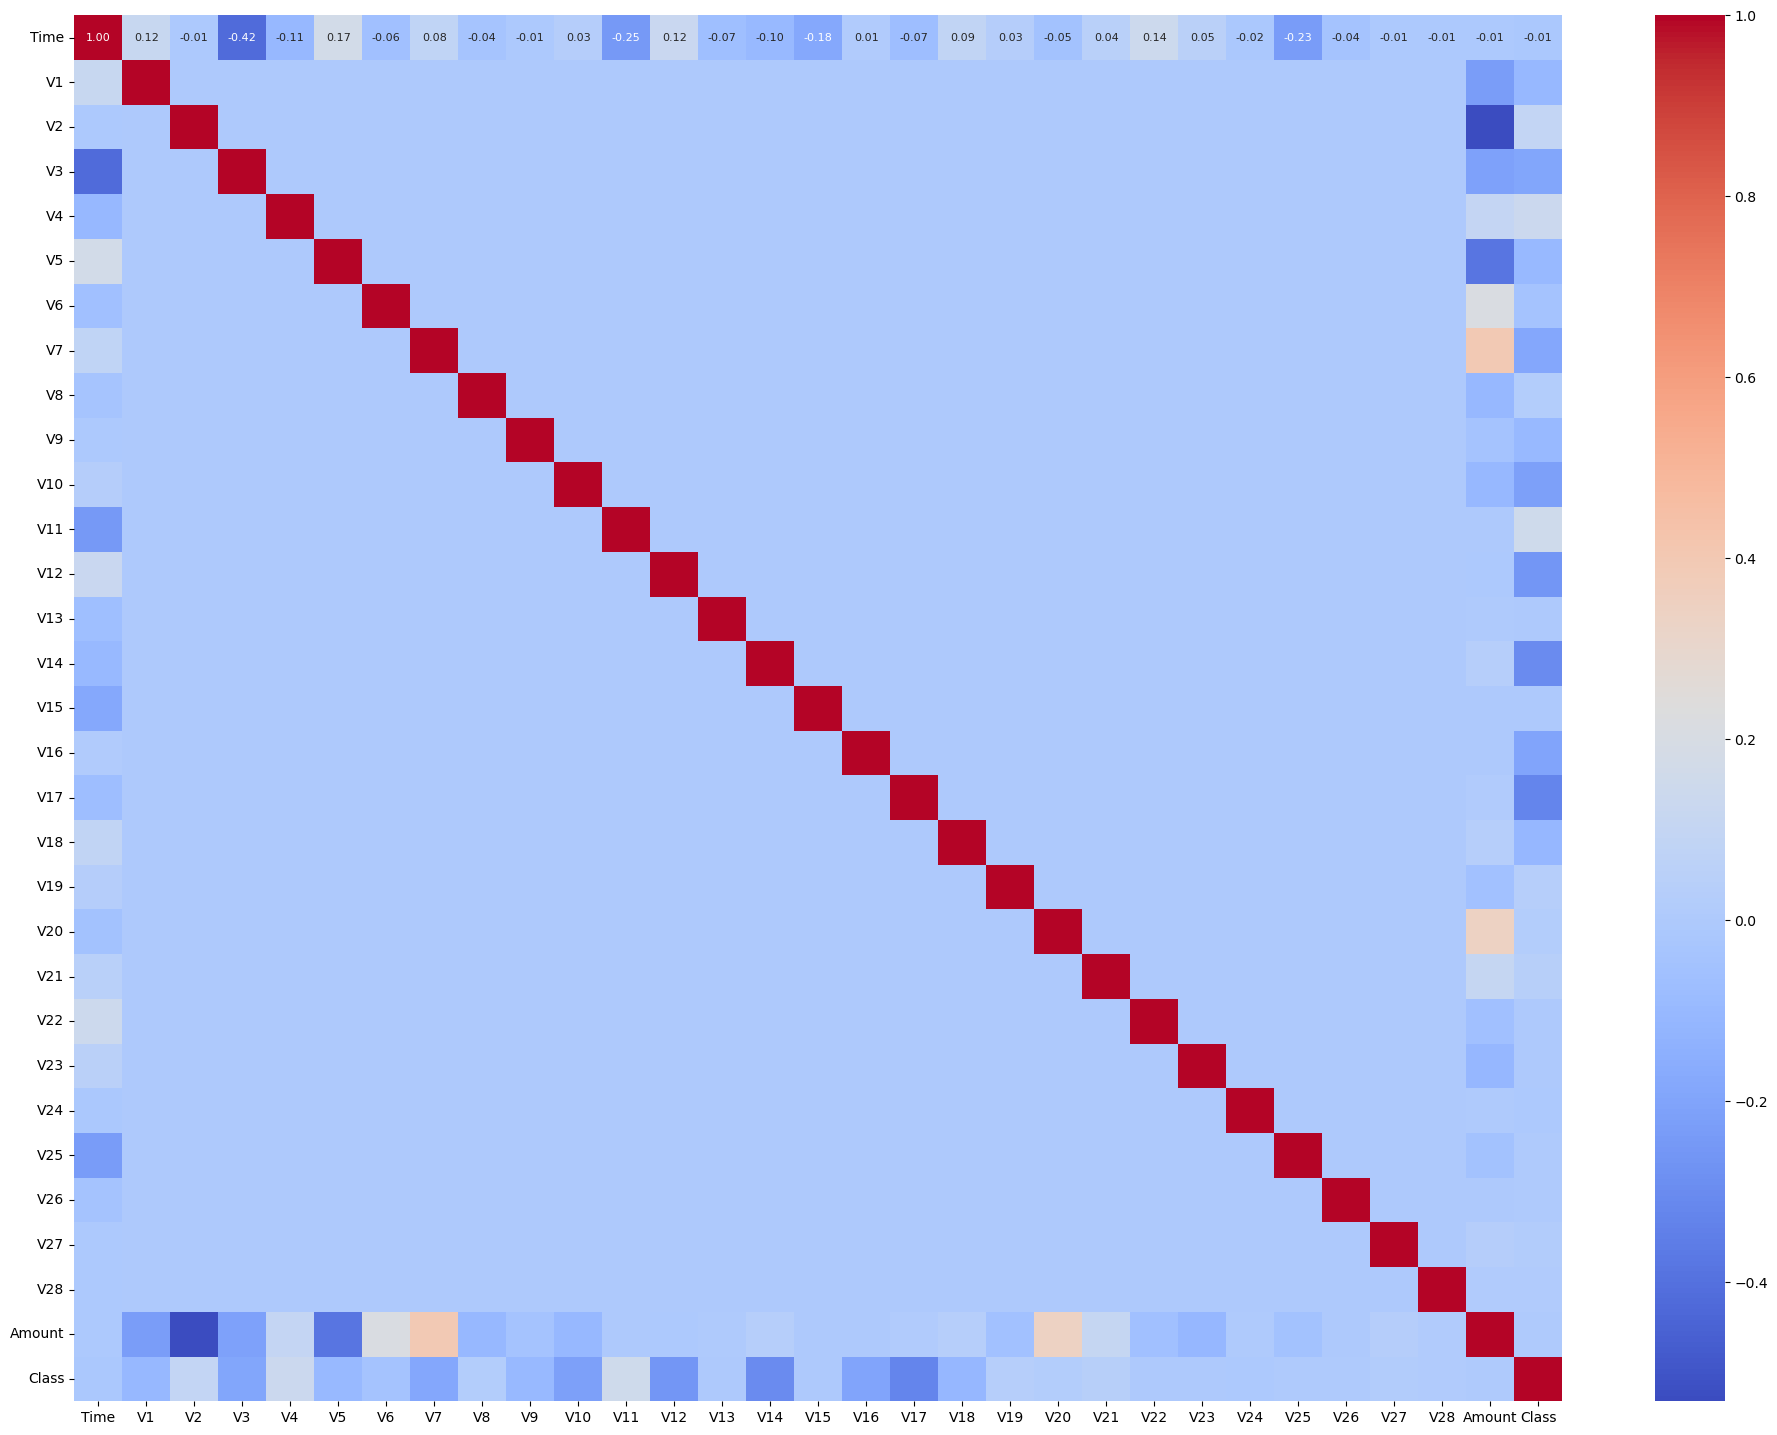

In [11]:
plt.figure(figsize=(24, 18))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 8})
plt.show()



### Feature Engenieering

In [12]:
delta_time = pd.to_timedelta(df['Time'],unit = 's')#feature creation
#create derived column mints adn houre
df['Time_hour'] = (delta_time.dt.components.hours).astype(int)

In [13]:
#drop unnecessory columns
df.drop(columns=['Time'],inplace = True)

In [14]:
df.drop(columns=['Time_hour'],inplace = True)

In [15]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Splitting the data into train and test

In [17]:
X = df.drop(columns=['Class'])
y = df['Class']

In [18]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [19]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train)

227845

In [21]:
#checing data spred
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### PLotting the distribution of a veriable

/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

<Figure size 640x480 with 0 Axes>

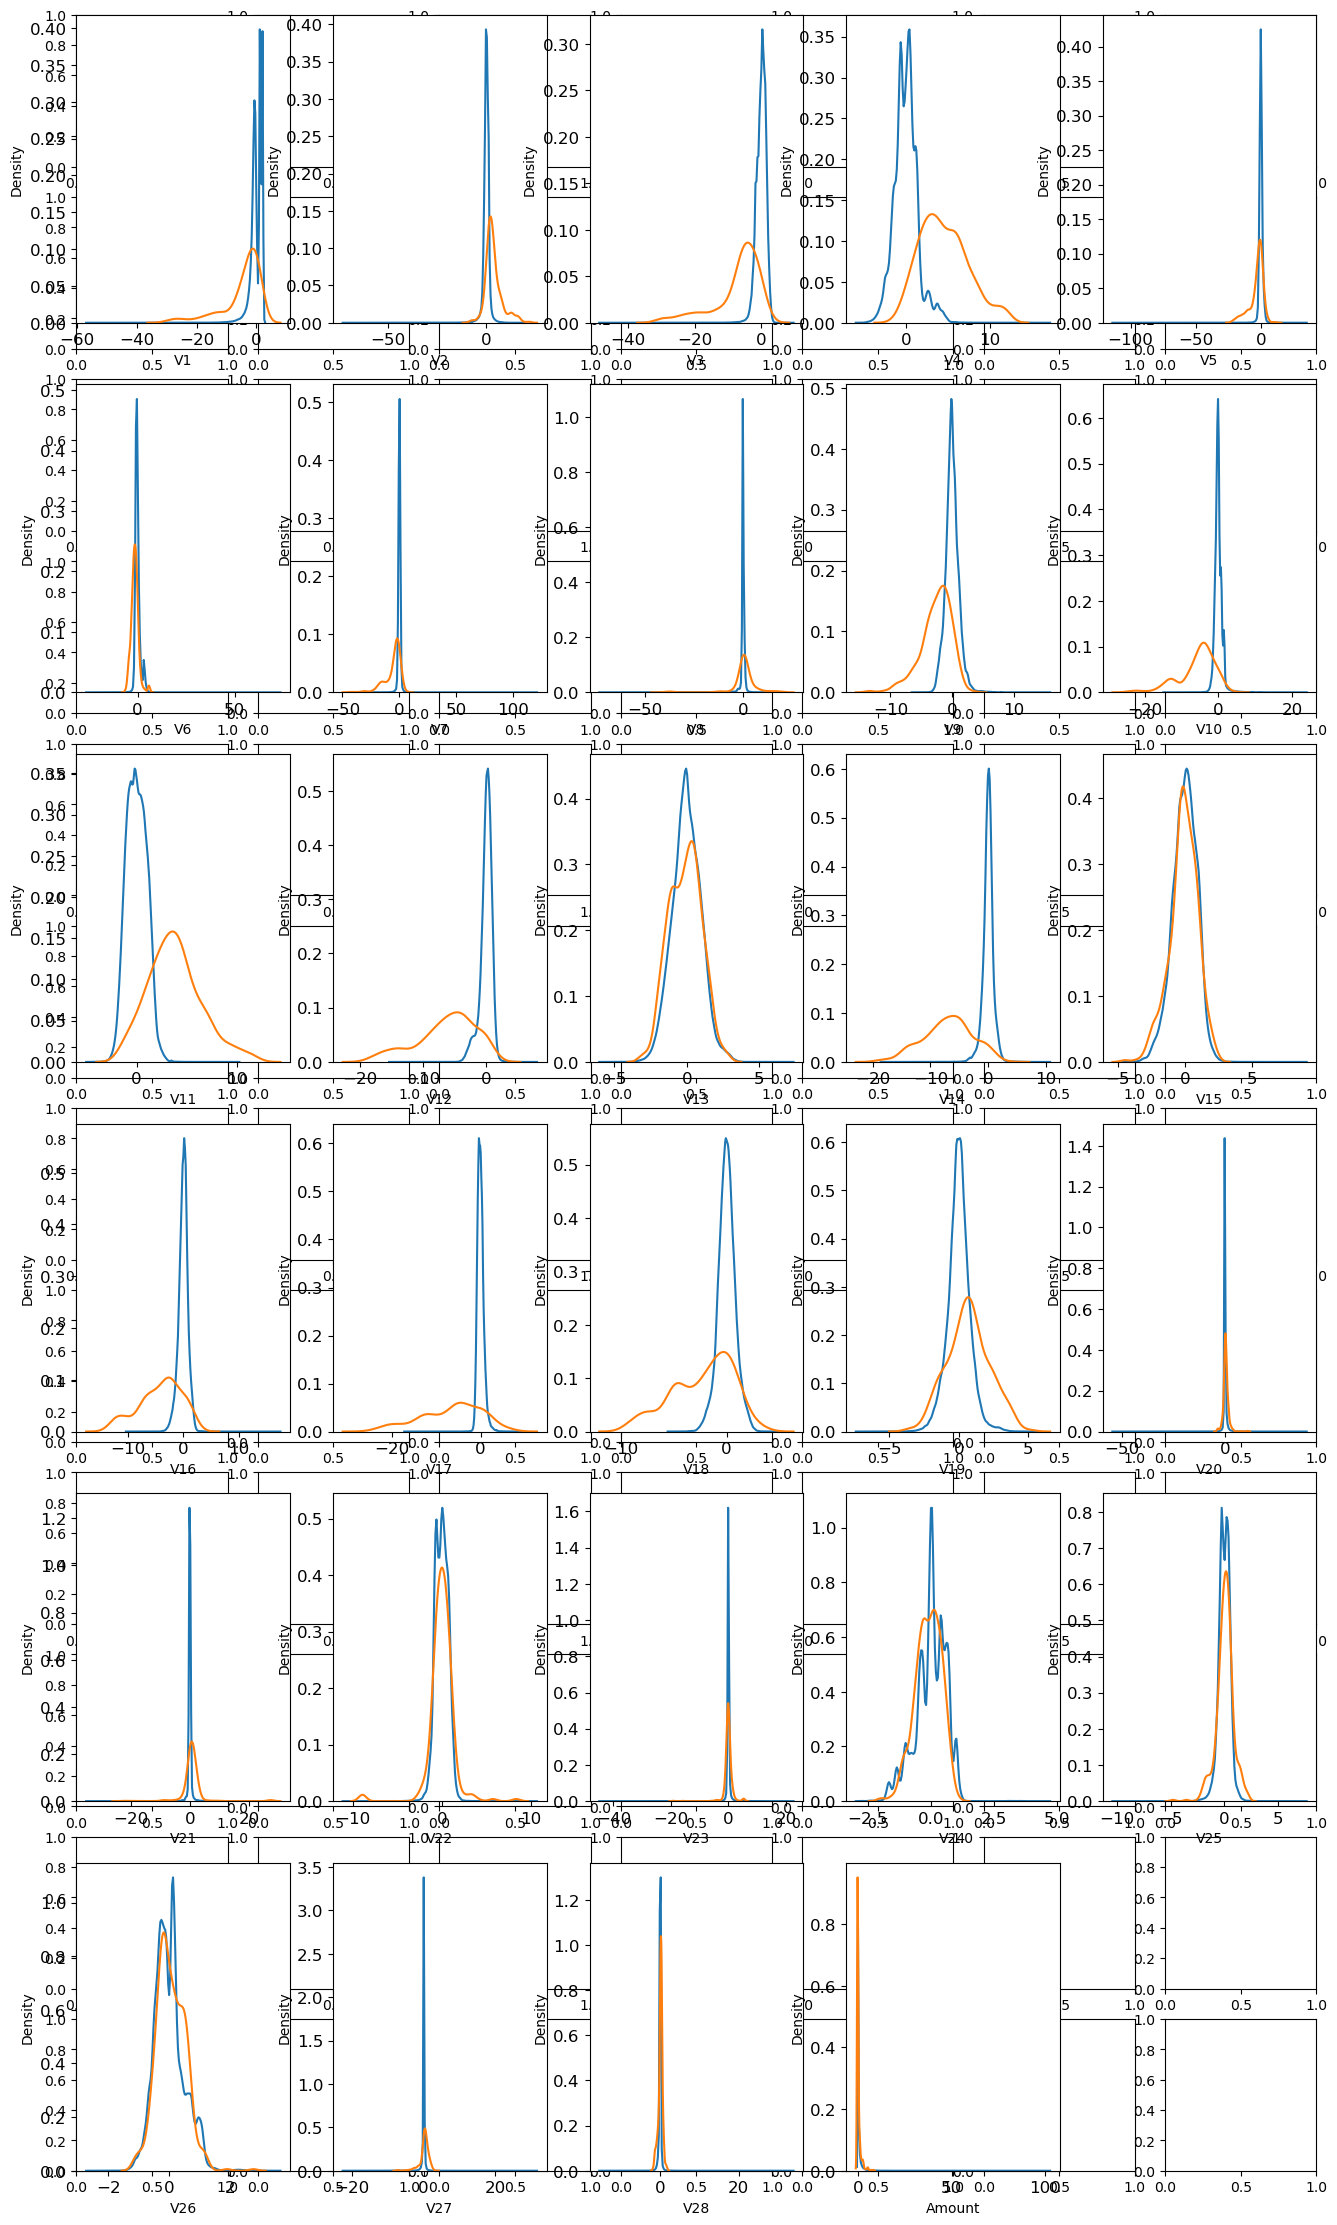

In [22]:
columns = list(df.columns.values)
columns.remove("Class")
n = 1
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(12,7,figsize=(16,28))

for i in columns:
    plt.subplot(6,5,n)
    sns.kdeplot(t0[i],label="0")
    sns.kdeplot(t1[i],label="1")
    plt.xlabel(i, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    n =n + 1
plt.show();

/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

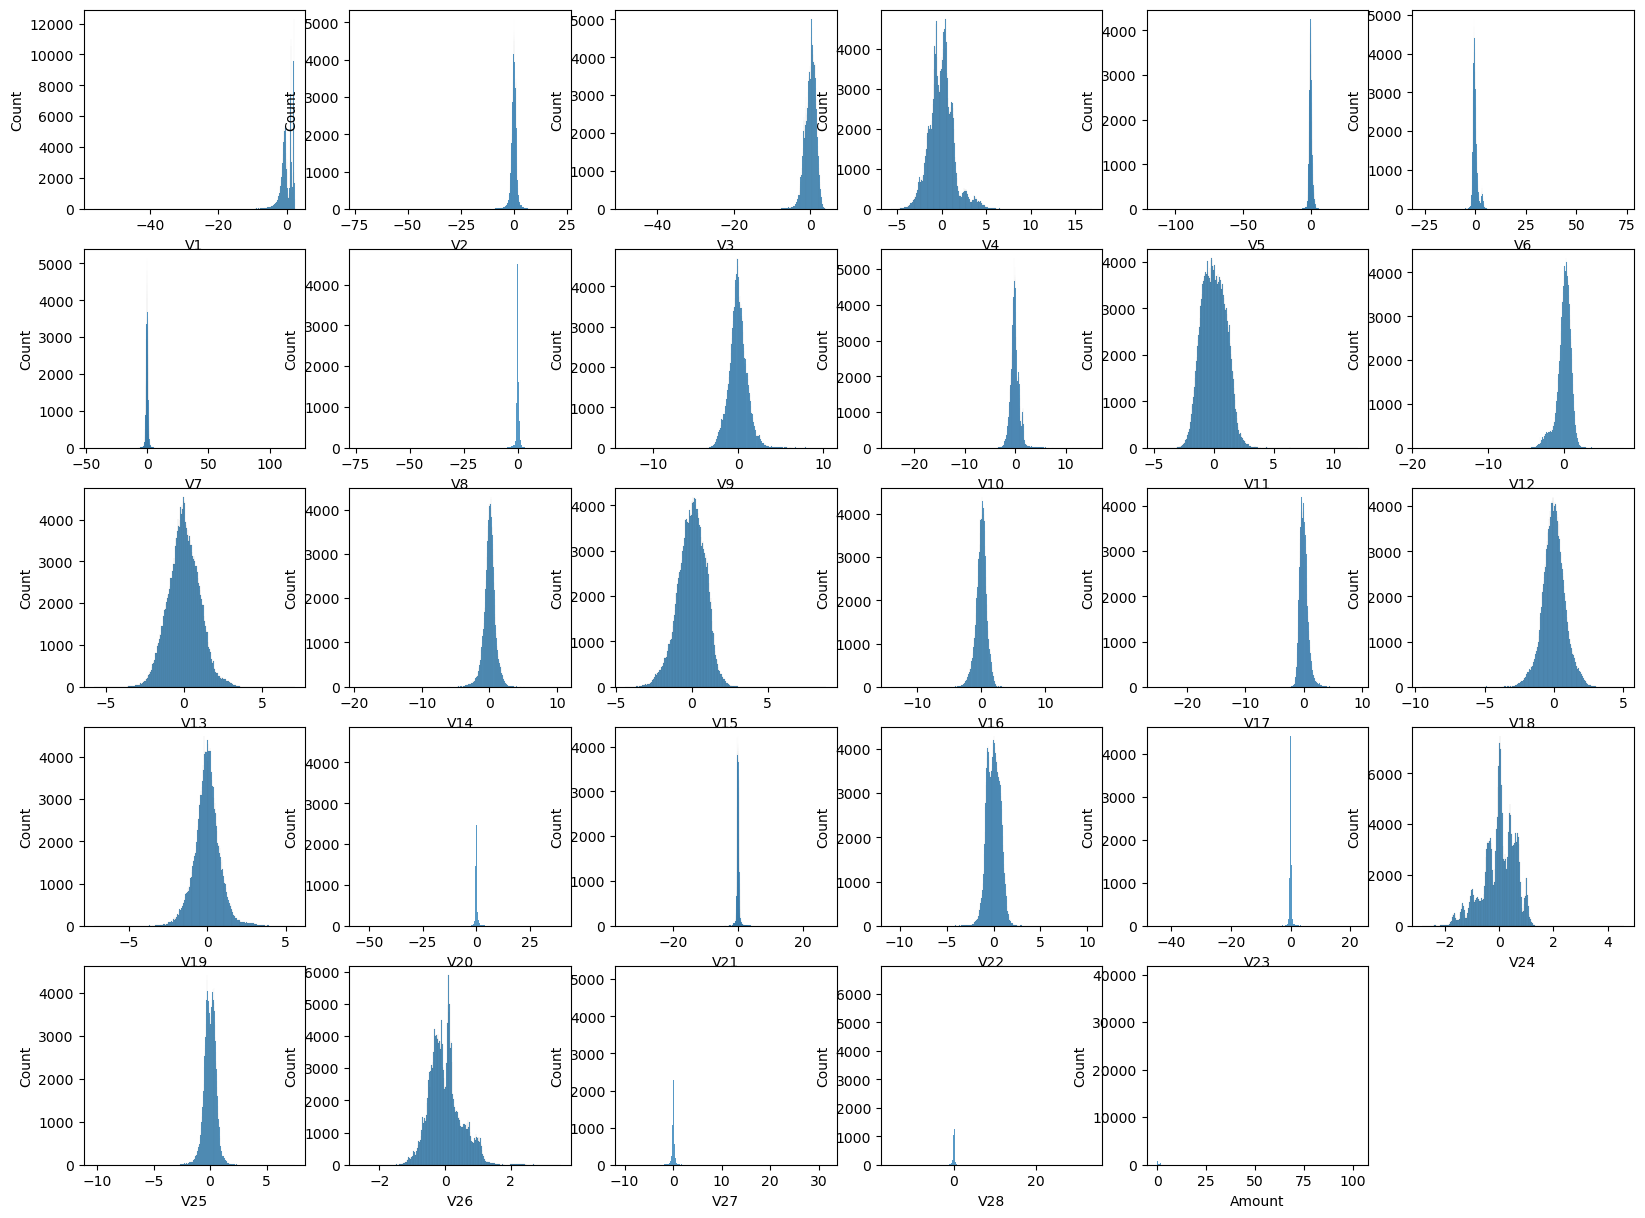

In [23]:
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

### apply yeo-jonnson

In [24]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[col] = pt.fit_transform(X_train)
X_test[col] = pt.transform(X_test)

/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

<Figure size 640x480 with 0 Axes>

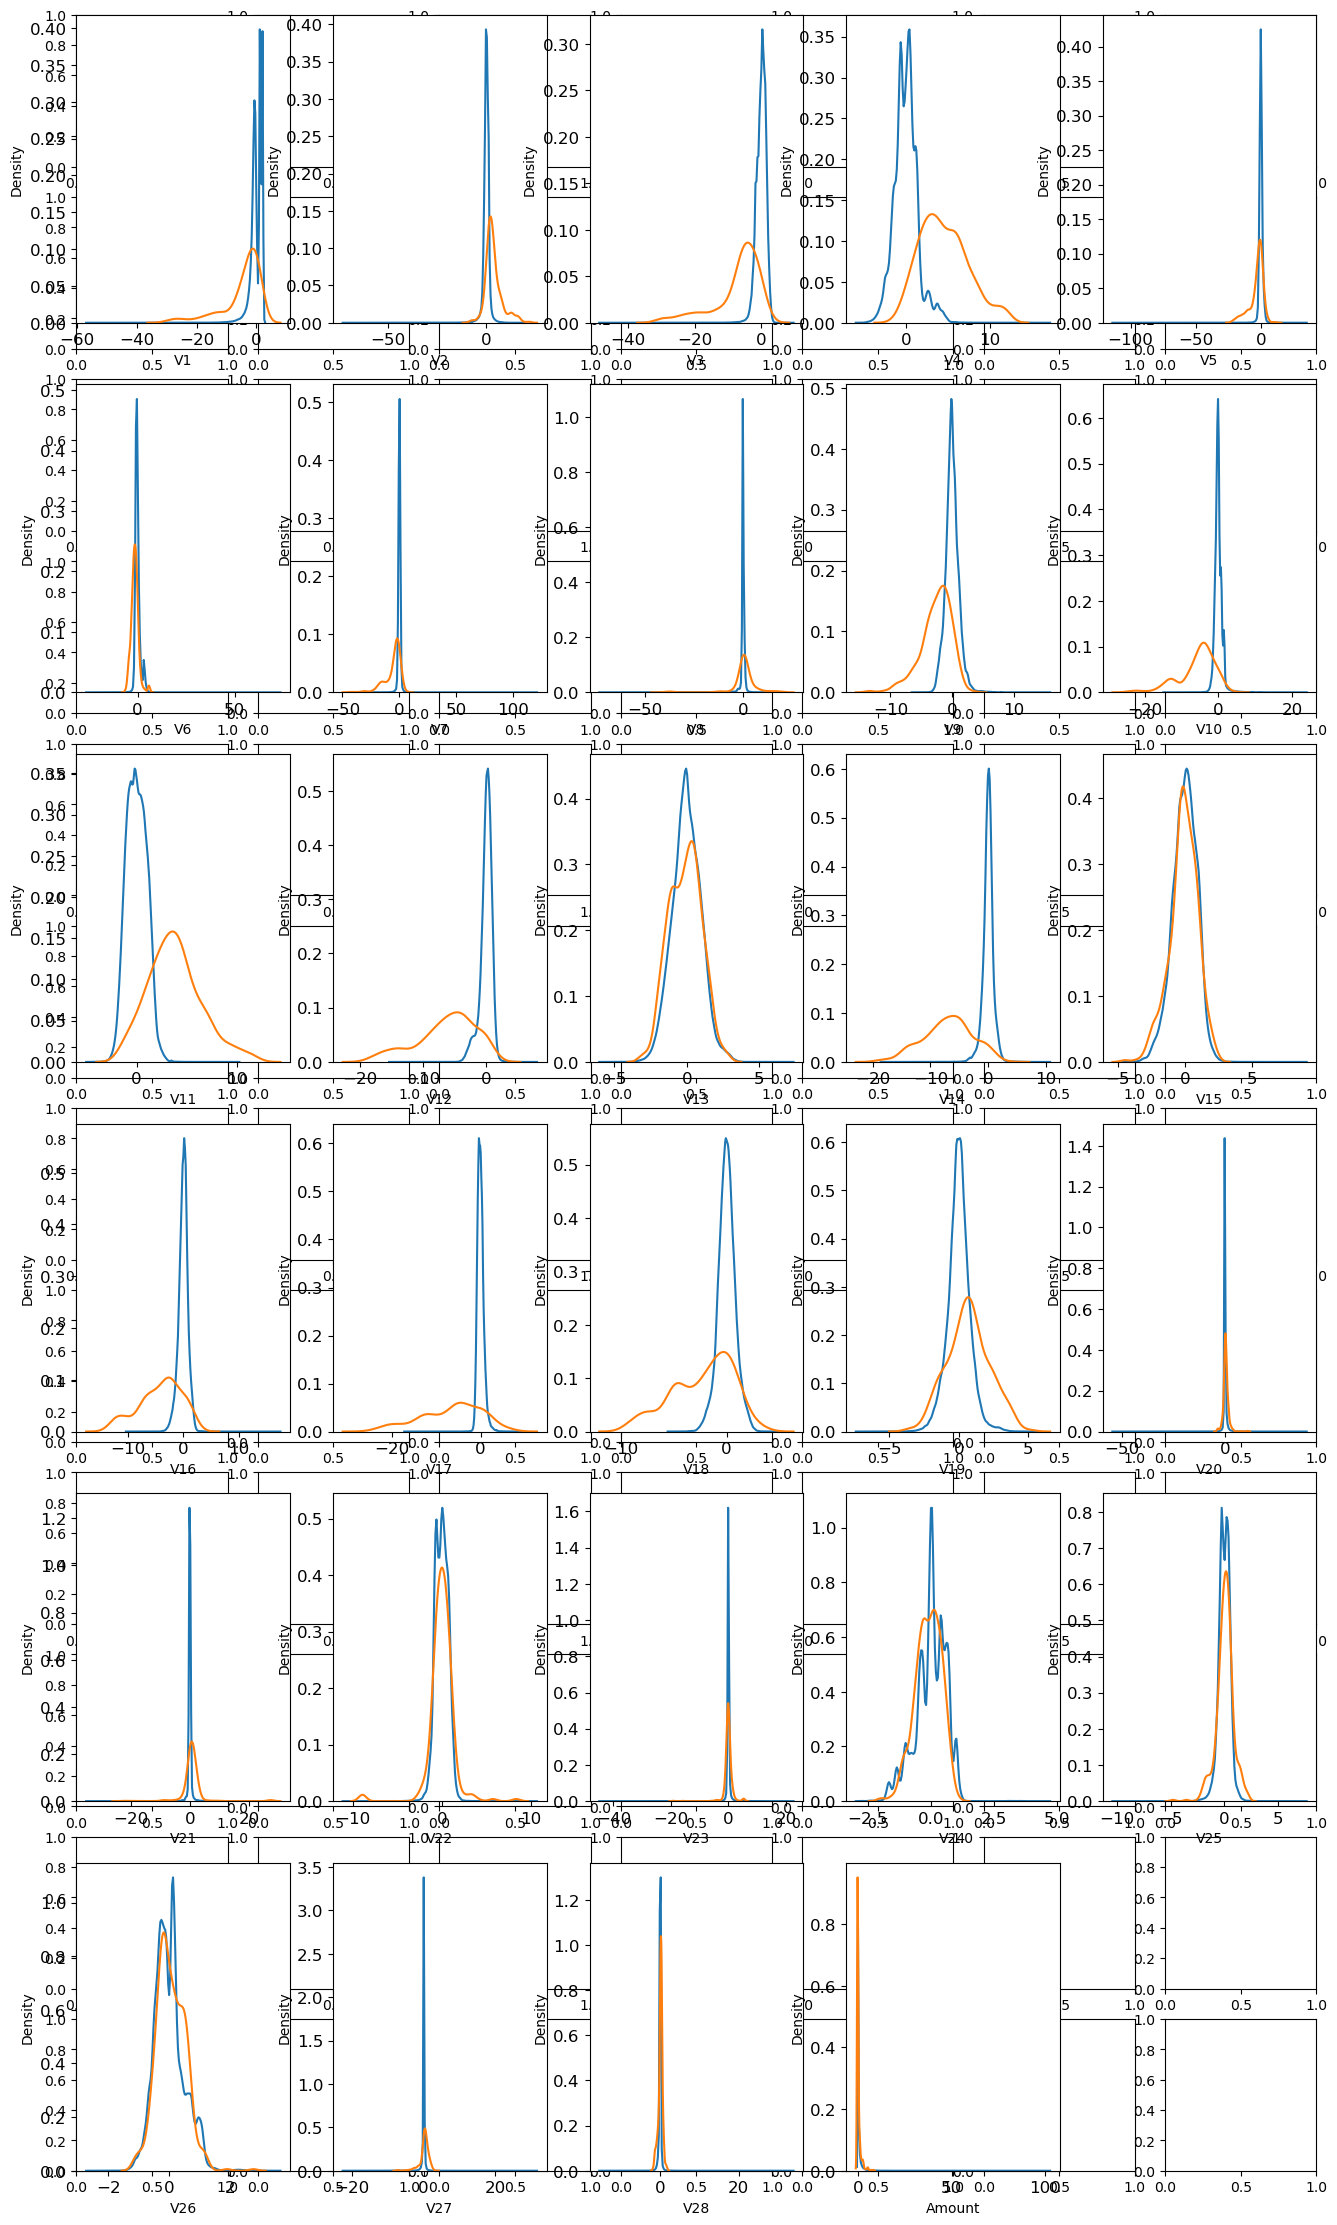

In [25]:
columns = list(df.columns.values)
columns.remove("Class")
n = 1
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]


plt.figure()
fig, ax = plt.subplots(12,7,figsize=(16,28))

for i in columns:
    plt.subplot(6,5,n)
    sns.kdeplot(t0[i],label="0")
    sns.kdeplot(t1[i],label="1")
    plt.xlabel(i, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    n =n + 1
plt.show();

Now data is normaly distributed

### Creating synthetic data using `SMOTE` (Since the dataset is imbalanced)

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before performing smote : ", Counter(y_train))
print("After performing smote : ", Counter(y_train_smote))

Before performing smote :  Counter({0: 227451, 1: 394})
After performing smote :  Counter({0: 227451, 1: 227451})


### Testing Model

In [27]:
from sklearn.linear_model import LogisticRegression

### 1.1. Logistic Regression without synthetic data

In [28]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
pred_test_0 = LR.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [31]:
accuracy_score(y_test,pred_test_0)

0.9992099996488887

In [32]:
confusion_matrix(y_test,pred_test_0)

array([[56855,     9],
       [   36,    62]])

### 1.1. Logistic Regression with synthetic data

In [33]:
LR = LogisticRegression()
LR.fit(X_train_smote,y_train_smote)
pred_test_1 = LR.predict(X_test)

In [34]:
accuracy_score(y_test,pred_test_1)

0.9703135423615744

In [35]:
confusion_matrix(y_test,pred_test_1)

array([[55180,  1684],
       [    7,    91]])

In [42]:
cm = confusion_matrix(y_test,pred_test_1)
tp = cm[1][1]  # True Positives
fp = cm[0][1]  # False Positives
fn = cm[1][0]  # False Negatives

# Accuracy
Accuracy_model1 = ((cm[0][0]+cm[1][1])/cm.sum())*100
print('Accuracy_score  : {:.2f}'.format(Accuracy_model1))

# Error rate
Error_rate= ((cm[0][1]+cm[1][0])/cm.sum())*100
print('Error_rate  : {:.2f}'.format(Error_rate))

# Precision
precision = tp / (tp + fp)
print('Precision: {:.2f}'.format(precision))

# Recall (Sensitivity)
recall = tp / (tp + fn)
print('Recall (Sensitivity): {:.2f}'.format(recall))


Accuracy_score  : 97.03
Error_rate  : 2.97
Precision: 0.05
Recall (Sensitivity): 0.93


### 2.1. Decision Tree Classifier without synthetic data

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
DT = DecisionTreeClassifier(criterion="entropy",max_depth=5)
DT.fit(X_train,y_train)
pred_test_model2 = DT.predict(X_test)
accuracy_score(y_test,pred_test_model2)

0.9993679997191109

In [44]:
cm = confusion_matrix(y_test,pred_test_model2)
tp = cm[1][1]  # True Positives
fp = cm[0][1]  # False Positives
fn = cm[1][0]  # False Negatives

# Accuracy
Accuracy_model1 = ((cm[0][0]+cm[1][1])/cm.sum())*100
print('Accuracy_score  : {:.2f}'.format(Accuracy_model1))

# Error rate
Error_rate= ((cm[0][1]+cm[1][0])/cm.sum())*100
print('Error_rate  : {:.2f}'.format(Error_rate))

# Precision
precision = tp / (tp + fp)
print('Precision: {:.2f}'.format(precision))

# Recall (Sensitivity)
recall = tp / (tp + fn)
print('Recall (Sensitivity): {:.2f}'.format(recall))

Accuracy_score  : 94.05
Error_rate  : 5.95
Precision: 0.02
Recall (Sensitivity): 0.88


### 2.1. Decision Tree Classifier with synthetic data

In [52]:
DT = DecisionTreeClassifier(criterion="entropy",max_depth=5)
DT.fit(X_train_smote,y_train_smote)
pred_test_model_2 = DT.predict(X_test)
accuracy_score(y_test,pred_test_model_2)

0.9404690846529266

In [53]:
cm = confusion_matrix(y_test,pred_test_model_2)
tp = cm[1][1]  # True Positives
fp = cm[0][1]  # False Positives
fn = cm[1][0]  # False Negatives

# Accuracy
Accuracy_model1 = ((cm[0][0]+cm[1][1])/cm.sum())*100
print('Accuracy_score  : {:.2f}'.format(Accuracy_model1))

# Error rate
Error_rate= ((cm[0][1]+cm[1][0])/cm.sum())*100
print('Error_rate  : {:.2f}'.format(Error_rate))

# Precision
precision = tp / (tp + fp)
print('Precision: {:.2f}'.format(precision))

# Recall (Sensitivity)
recall = tp / (tp + fn)
print('Recall (Sensitivity): {:.2f}'.format(recall))

Accuracy_score  : 94.05
Error_rate  : 5.95
Precision: 0.02
Recall (Sensitivity): 0.88


### 3.1. K Nearest Neighbors Classifier without synthetic data

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [58]:
model_ws_3 = KNeighborsClassifier(n_neighbors=3)
model_ws_3.fit(X_train, y_train)
y_pred_ws_3 = model_ws_3.predict(X_test)
acc_ws_3 = accuracy_score(y_test, y_pred_ws_3)
acc_ws_3

0.9995962220427653

In [59]:
cm = confusion_matrix(y_test,y_pred_ws_3)
tp = cm[1][1]  # True Positives
fp = cm[0][1]  # False Positives
fn = cm[1][0]  # False Negatives

# Accuracy
Accuracy_model1 = ((cm[0][0]+cm[1][1])/cm.sum())*100
print('Accuracy_score  : {:.2f}'.format(Accuracy_model1))

# Error rate
Error_rate= ((cm[0][1]+cm[1][0])/cm.sum())*100
print('Error_rate  : {:.2f}'.format(Error_rate))

# Precision
precision = tp / (tp + fp)
print('Precision: {:.2f}'.format(precision))

# Recall (Sensitivity)
recall = tp / (tp + fn)
print('Recall (Sensitivity): {:.2f}'.format(recall))

Accuracy_score  : 99.96
Error_rate  : 0.04
Precision: 0.94
Recall (Sensitivity): 0.82


### 3.1. K Nearest Neighbors Classifier with synthetic data

In [60]:
model_s_4 = KNeighborsClassifier(n_neighbors=3)
model_s_4.fit(X_train_smote, y_train_smote)
y_pred_s_4 = model_s_4.predict(X_test)
acc_s_4 = accuracy_score(y_test, y_pred_s_4)
acc_s_4

0.9985077771145676

In [61]:
cm = confusion_matrix(y_test,y_pred_s_4)
tp = cm[1][1]  # True Positives
fp = cm[0][1]  # False Positives
fn = cm[1][0]  # False Negatives

# Accuracy
Accuracy_model1 = ((cm[0][0]+cm[1][1])/cm.sum())*100
print('Accuracy_score  : {:.2f}'.format(Accuracy_model1))

# Error rate
Error_rate= ((cm[0][1]+cm[1][0])/cm.sum())*100
print('Error_rate  : {:.2f}'.format(Error_rate))

# Precision
precision = tp / (tp + fp)
print('Precision: {:.2f}'.format(precision))

# Recall (Sensitivity)
recall = tp / (tp + fn)
print('Recall (Sensitivity): {:.2f}'.format(recall))

Accuracy_score  : 99.85
Error_rate  : 0.15
Precision: 0.54
Recall (Sensitivity): 0.87


### 5.1. Random Forest Classifier without synthetic data

In [64]:
model_s_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_s_5.fit(X_train_smote, y_train_smote)
y_pred_s_5 = model_s_5.predict(X_test)
acc_s_5 = accuracy_score(y_test, y_pred_s_5)
acc_s_5

0.9951371089498262

In [65]:
cm = confusion_matrix(y_test,y_pred_s_5)
tp = cm[1][1]  # True Positives
fp = cm[0][1]  # False Positives
fn = cm[1][0]  # False Negatives

# Accuracy
Accuracy_model1 = ((cm[0][0]+cm[1][1])/cm.sum())*100
print('Accuracy_score  : {:.2f}'.format(Accuracy_model1))

# Error rate
Error_rate= ((cm[0][1]+cm[1][0])/cm.sum())*100
print('Error_rate  : {:.2f}'.format(Error_rate))

# Precision
precision = tp / (tp + fp)
print('Precision: {:.2f}'.format(precision))

# Recall (Sensitivity)
recall = tp / (tp + fn)
print('Recall (Sensitivity): {:.2f}'.format(recall))

Accuracy_score  : 99.51
Error_rate  : 0.49
Precision: 0.25
Recall (Sensitivity): 0.89


### 5.1. Random Forest Classifier with synthetic data

In [66]:
model_s_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_s_5.fit(X_train_smote, y_train_smote)
y_pred_s_5 = model_s_5.predict(X_test)
acc_s_5 = accuracy_score(y_test, y_pred_s_5)
acc_s_5

0.996892665285629

In [67]:
cm = confusion_matrix(y_test,y_pred_s_5)
tp = cm[1][1]  # True Positives
fp = cm[0][1]  # False Positives
fn = cm[1][0]  # False Negatives

# Accuracy
Accuracy_model1 = ((cm[0][0]+cm[1][1])/cm.sum())*100
print('Accuracy_score  : {:.2f}'.format(Accuracy_model1))

# Error rate
Error_rate= ((cm[0][1]+cm[1][0])/cm.sum())*100
print('Error_rate  : {:.2f}'.format(Error_rate))

# Precision
precision = tp / (tp + fp)
print('Precision: {:.2f}'.format(precision))

# Recall (Sensitivity)
recall = tp / (tp + fn)
print('Recall (Sensitivity): {:.2f}'.format(recall))

Accuracy_score  : 99.69
Error_rate  : 0.31
Precision: 0.34
Recall (Sensitivity): 0.89


### 6.1. Support Vector Classifier without synthetic data

In [68]:
model_ws_6 = SVC()
model_ws_6.fit(X_train, y_train)
y_pred_ws_6 = model_ws_6.predict(X_test)
acc_ws_6 = accuracy_score(y_test, y_pred_ws_6)
acc_ws_6

0.9993153330290369

In [69]:
cm = confusion_matrix(y_test,y_pred_ws_6)
tp = cm[1][1]  # True Positives
fp = cm[0][1]  # False Positives
fn = cm[1][0]  # False Negatives

# Accuracy
Accuracy_model1 = ((cm[0][0]+cm[1][1])/cm.sum())*100
print('Accuracy_score  : {:.2f}'.format(Accuracy_model1))

# Error rate
Error_rate= ((cm[0][1]+cm[1][0])/cm.sum())*100
print('Error_rate  : {:.2f}'.format(Error_rate))

# Precision
precision = tp / (tp + fp)
print('Precision: {:.2f}'.format(precision))

# Recall (Sensitivity)
recall = tp / (tp + fn)
print('Recall (Sensitivity): {:.2f}'.format(recall))

Accuracy_score  : 99.93
Error_rate  : 0.07
Precision: 0.95
Recall (Sensitivity): 0.63


### 6.1. Support Vector Classifier with synthetic data

In [71]:
model_s_6 = SVC()
model_s_6.fit(X_train_smote, y_train_smote)
y_pred_s_6 = model_s_6.predict(X_test)
acc_s_6 = accuracy_score(y_test, y_pred_s_6)
acc_s_6

0.9862013272005898

In [72]:
cm = confusion_matrix(y_test,y_pred_s_6)
tp = cm[1][1]  # True Positives
fp = cm[0][1]  # False Positives
fn = cm[1][0]  # False Negatives

# Accuracy
Accuracy_model1 = ((cm[0][0]+cm[1][1])/cm.sum())*100
print('Accuracy_score  : {:.2f}'.format(Accuracy_model1))

# Error rate
Error_rate= ((cm[0][1]+cm[1][0])/cm.sum())*100
print('Error_rate  : {:.2f}'.format(Error_rate))

# Precision
precision = tp / (tp + fp)
print('Precision: {:.2f}'.format(precision))

# Recall (Sensitivity)
recall = tp / (tp + fn)
print('Recall (Sensitivity): {:.2f}'.format(recall))

Accuracy_score  : 98.62
Error_rate  : 1.38
Precision: 0.10
Recall (Sensitivity): 0.88
